# <p style="background-color:#75d9b4; font-family:newtimeroman; color:#a81379; font-size:175%; text-align:center; border-radius:10px 10px;">Seaborn: Categorical Plots

## <span style ="color:red;"> Table of Contents

##### 1. Categorical Plots: Statistical Estimation within Categories
##### 1.1. countplot()
   * hue
   * palette 
##### 1.2. barplot()
##### 2. Categorical Plots: Distribution within Categories
##### 2.1. boxplot()
   * Orientation
   * Width     
##### 2.2. violinplot()
   * split=True
   * inner=None
   * inner="quartile"
   * inner="stick"
   * inner="box"
   * orientation
   * bandwidth (bw)   
##### 2.3. swarmplot()
   * size
   * dodge=True
##### 2.4. boxenplot()
* box plot vs boxen plot


## 1. Categorical Plots: Statistical Estimation within Categories
* Often we have **categorical** data, meaning the data is in distinct groupings, such as Countries or Companies. There is no country value "between" USA and France and there is no company value "between" Google and Apple, unlike continuous data where we know values can exist between data points, such as age or price.
* There are two types of plots examined here:
  
**1.1. countplot():** Counts number of rows per category.

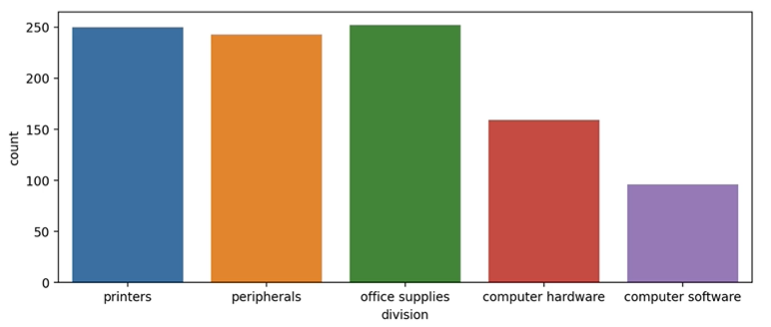
   
**1.2. barplot():** It is the general form that allows you to choose any measure or estimator for the y axis. We could plot the mean value and standard deviation per category instead.

**Important Note:** Be very careful with these plots, since the bar is filled and continues, a viewer may nterpret continuity along the y-axis which may be incorrect. Always make sure to add additional labeling and explanation for these plots!

For example, in the figure below, the black lines on the top of the bar plots represent **standard deviation (SD)** and the filled plot show the average value. So, in addition to average values, this SD must be taken into consideration.

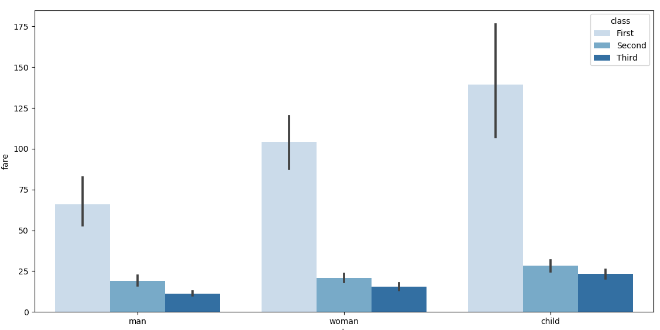

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [2]:
df = pd.read_csv("dm_office_sales.csv")
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   division            1000 non-null   object
 1   level of education  1000 non-null   object
 2   training level      1000 non-null   int64 
 3   work experience     1000 non-null   int64 
 4   salary              1000 non-null   int64 
 5   sales               1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


## 1.1. countplot()

There is no variable for y-axis and y axis represents count in countplot (similar to a .groupby(x_axis).count() call in pandas).

In [4]:
# The categories in the division variable
df["division"].value_counts()

division
office supplies      252
printers             250
peripherals          243
computer hardware    159
computer software     96
Name: count, dtype: int64

<Axes: xlabel='division', ylabel='count'>

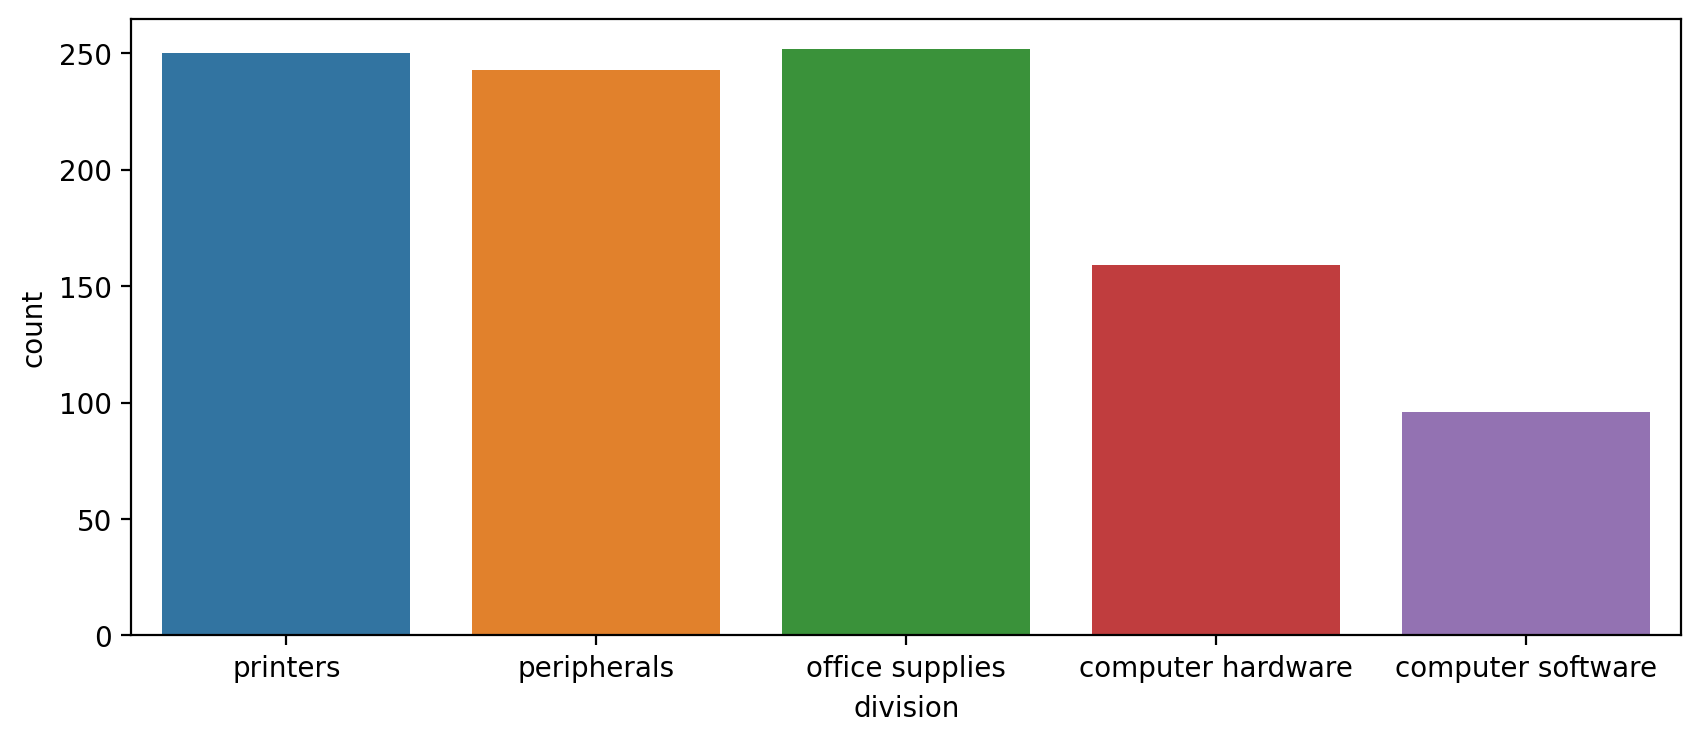

In [5]:
# count plot for division
plt.figure(figsize=(10,4), dpi=200)
sns.countplot(data=df, x="division")

In [6]:
# categories of "level of education" variable
df["level of education"].value_counts()

level of education
associate's degree    412
some college          392
high school           108
bachelor's degree      85
master's degree         3
Name: count, dtype: int64

<Axes: xlabel='level of education', ylabel='count'>

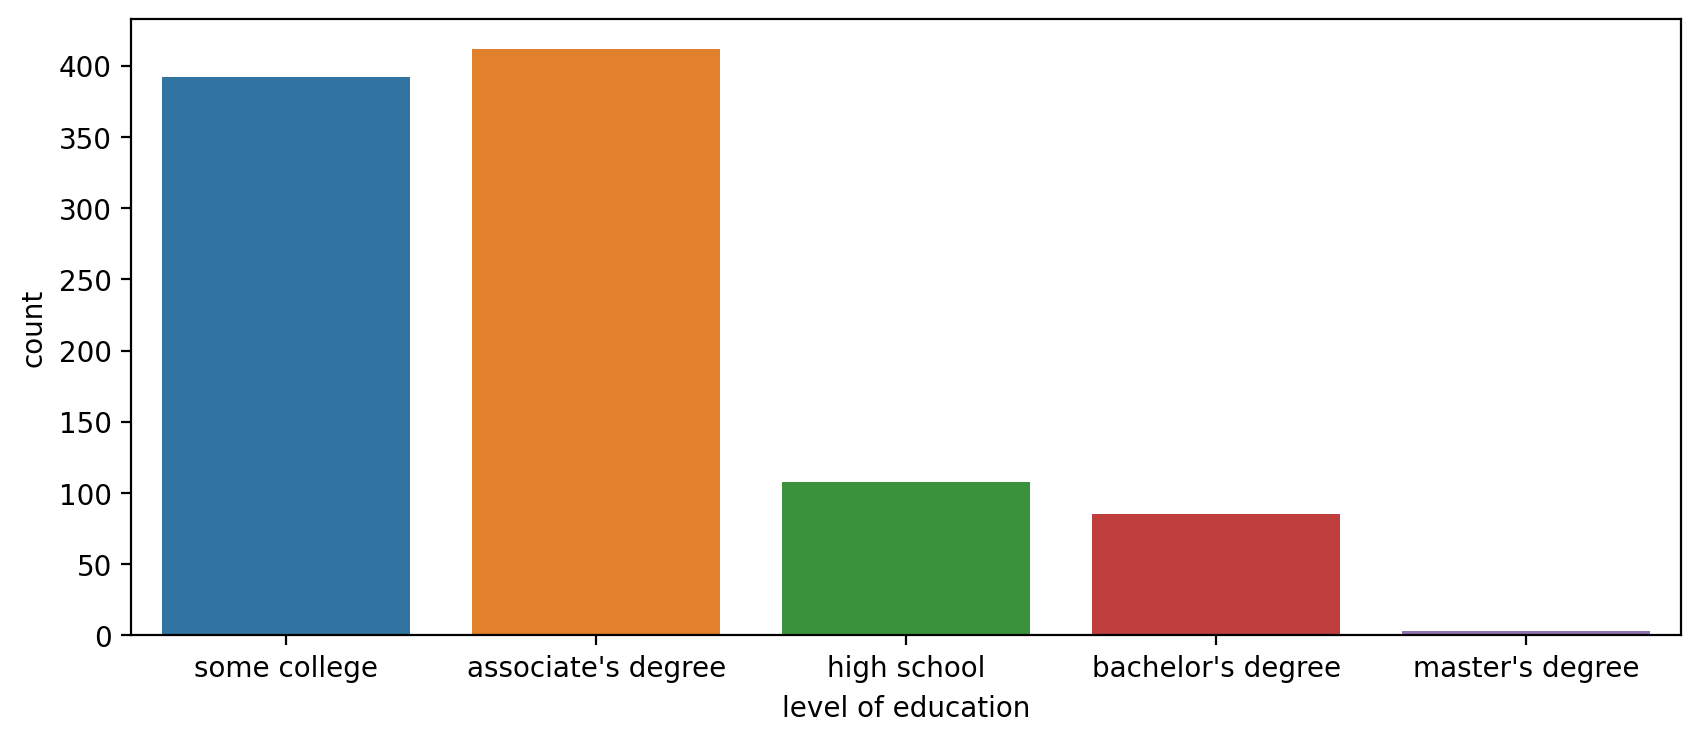

In [7]:
# count plot for level of education
plt.figure(figsize=(10,4), dpi=200)
sns.countplot(data=df, x="level of education")

# We can see the exact numbers for the categories in "value_counts" above

### hue: add another variable

<Axes: xlabel='level of education', ylabel='count'>

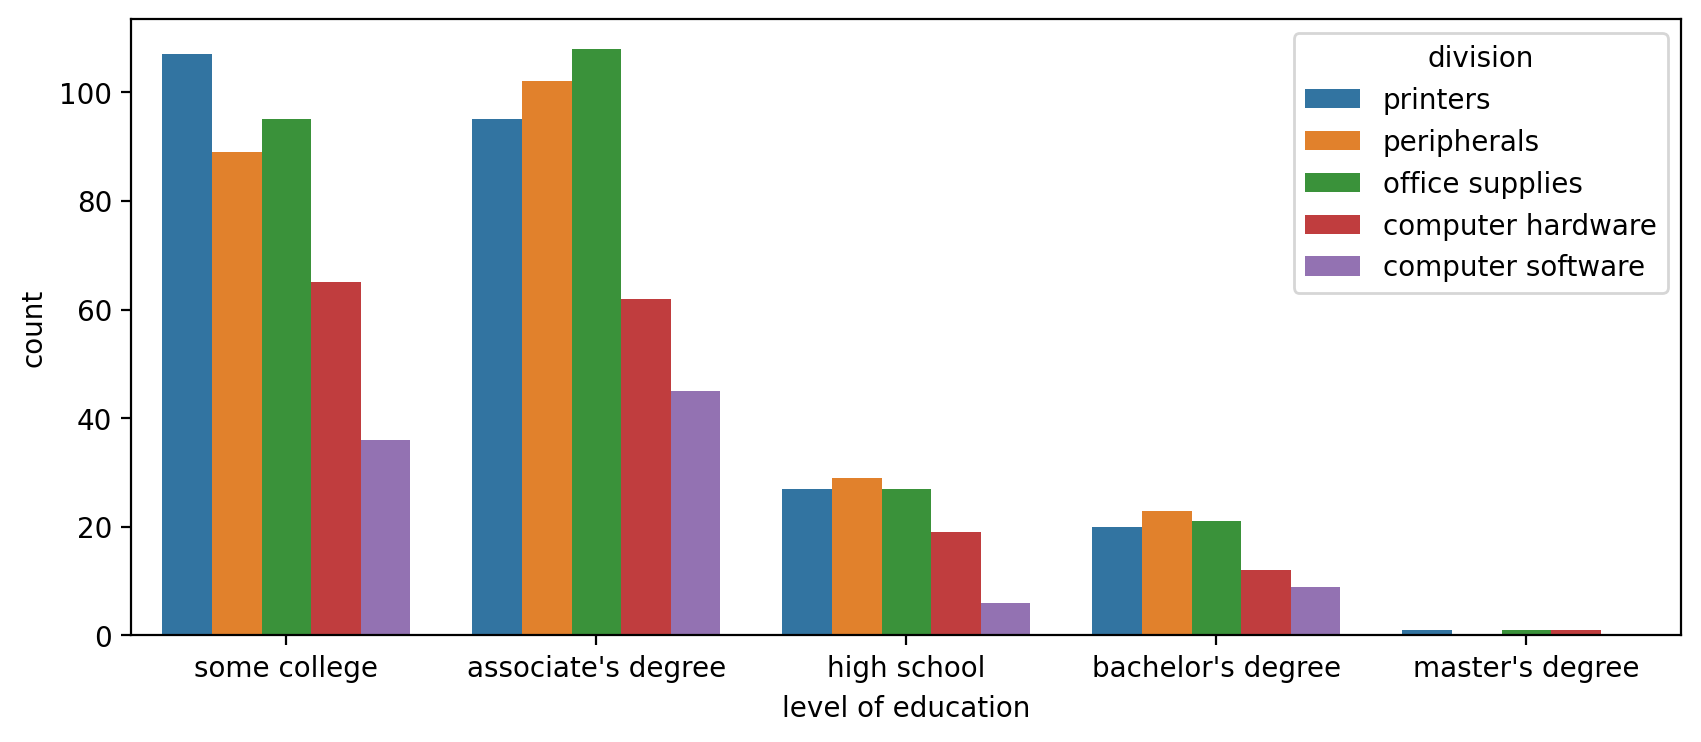

In [8]:
plt.figure(figsize=(10,4), dpi=200)
sns.countplot(data=df, x="level of education", hue="division")

### palette: color the plot

<Axes: xlabel='level of education', ylabel='count'>

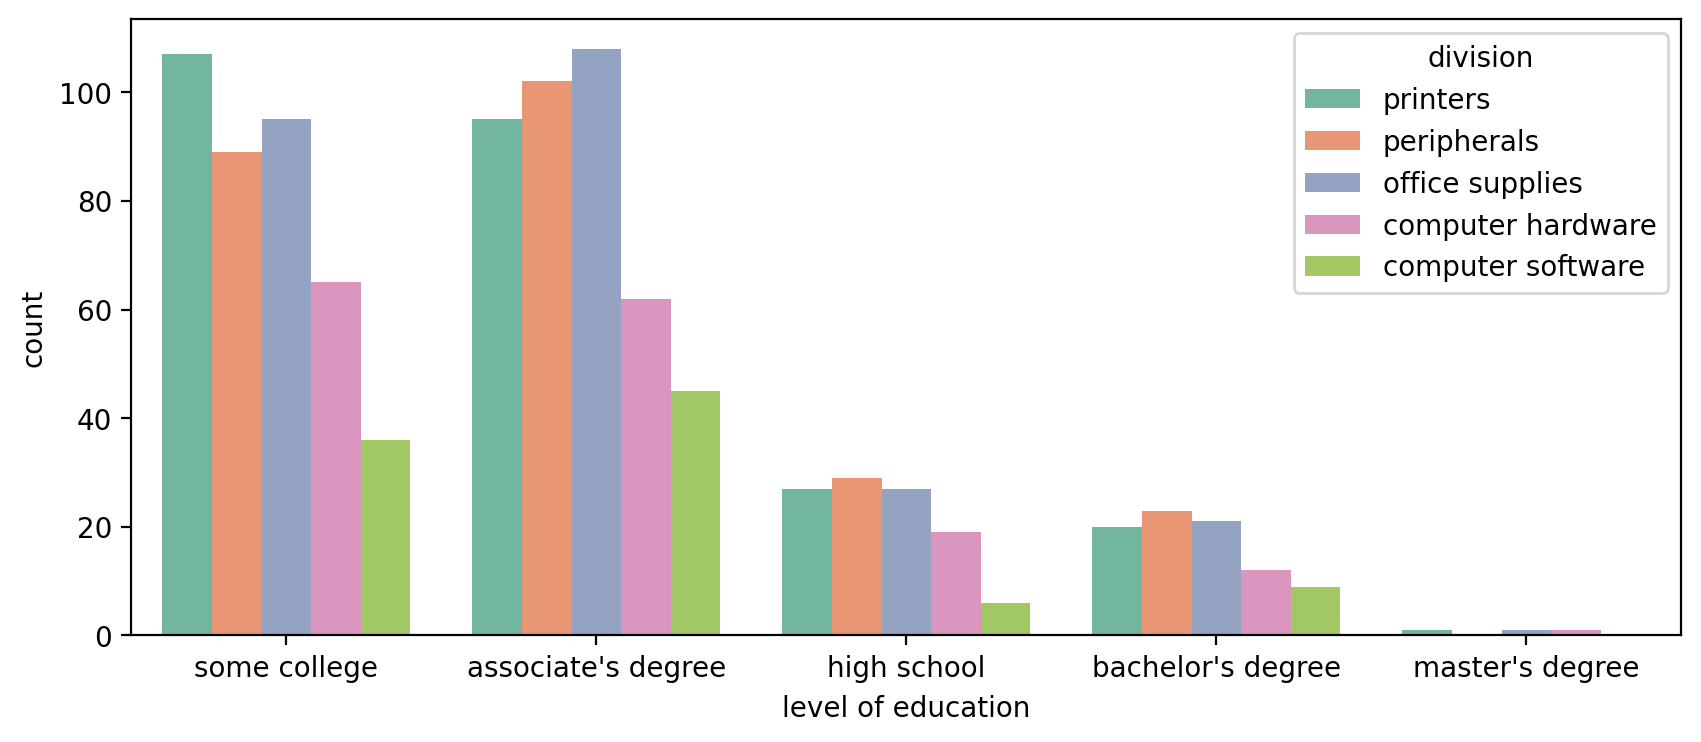

In [9]:
plt.figure(figsize=(10,4), dpi=200)
sns.countplot(data=df, x="level of education", hue="division", palette="Set2")

# for the palette list, see matplotlib page

## 1.2. barplot()

We can expand our visualizations by specifying a specific continuous feature for the y-axis. Keep in mind, you should be careful with these plots, as they may imply a relationship continuity along the y axis.

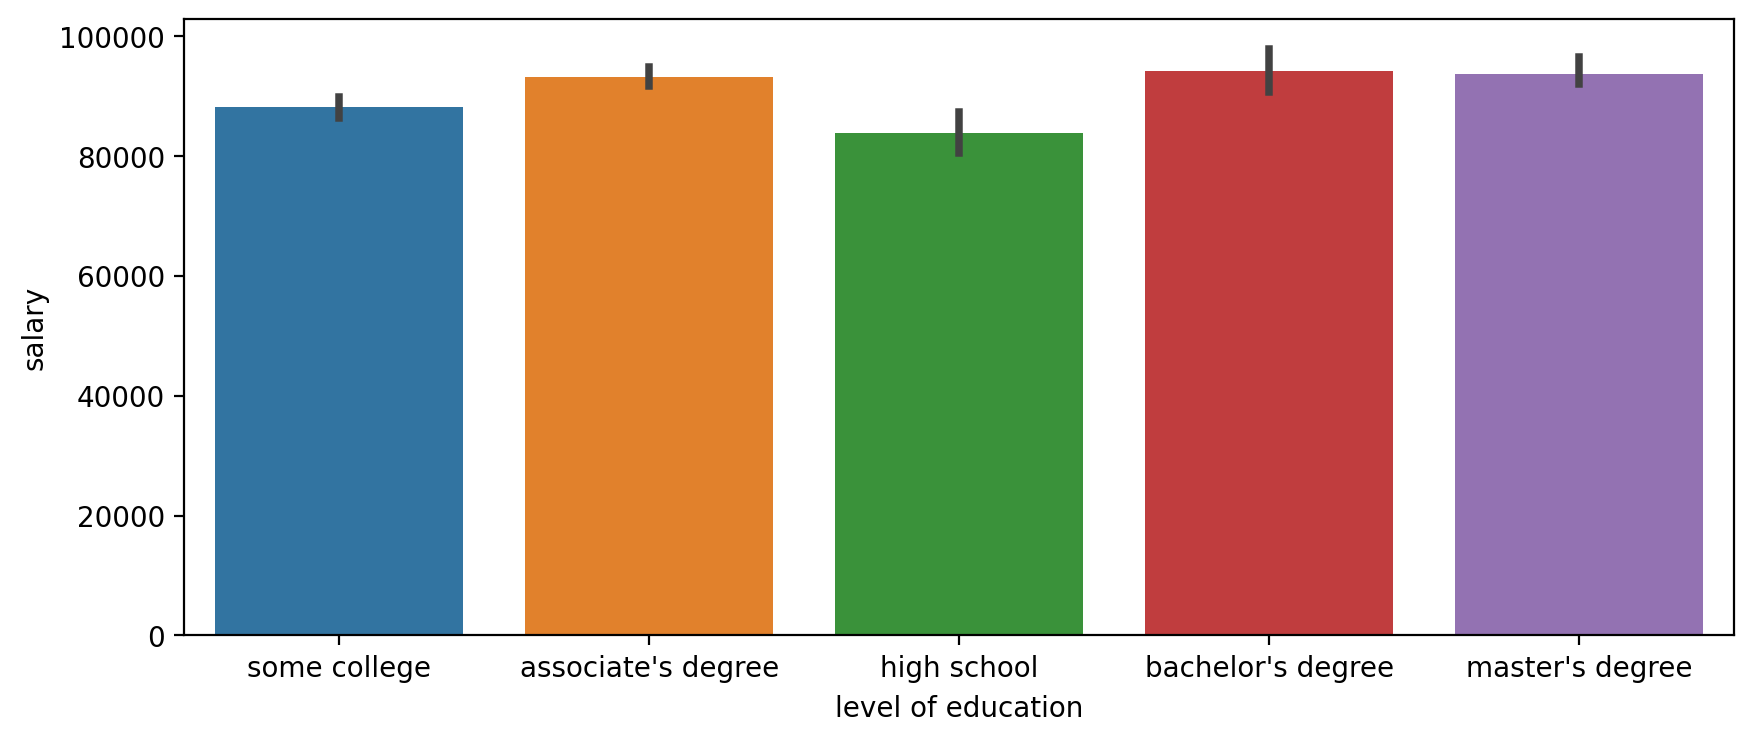

In [10]:
# in barplot we can use y-axis, too.
plt.figure(figsize=(10,4), dpi=200)
sns.barplot(data=df, x="level of education", y="salary", estimator=np.mean);

# calculate mean value of y (salary) according to x (for each level of education)
# However, by default, it already shows mean


C:\Users\admin\AppData\Local\Temp\ipykernel_17564\3937480842.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x="level of education", y="salary", estimator=np.mean, ci="sd");


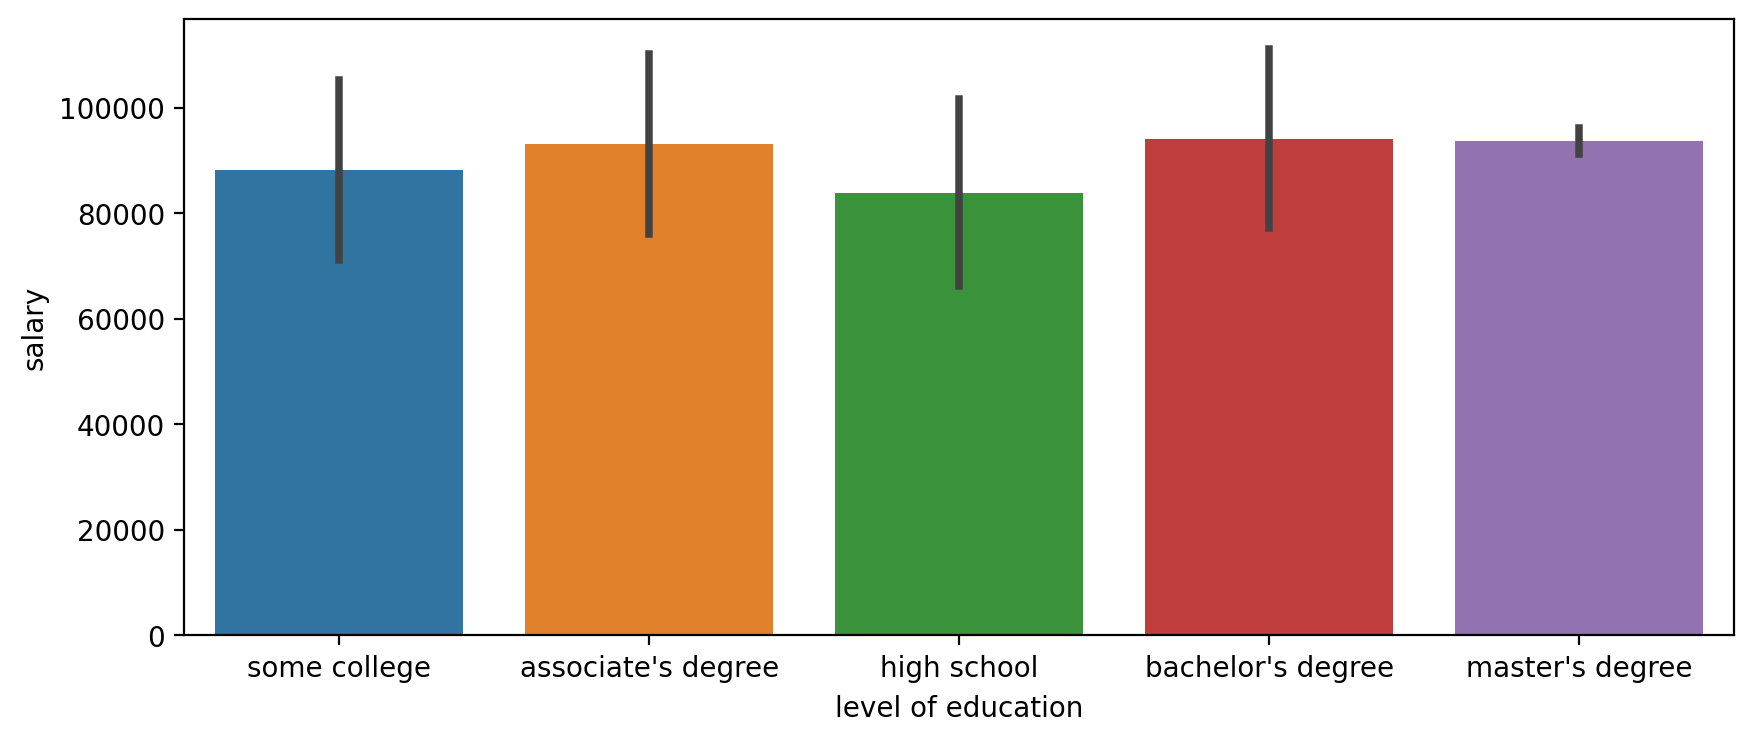

In [11]:
plt.figure(figsize=(10,4), dpi=200)
sns.barplot(data=df, x="level of education", y="salary", estimator=np.mean, ci="sd");
# ci: size of confidence intervals to draw around estimated value
# sd: standard deviation
# !!!Look at the warning below: The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

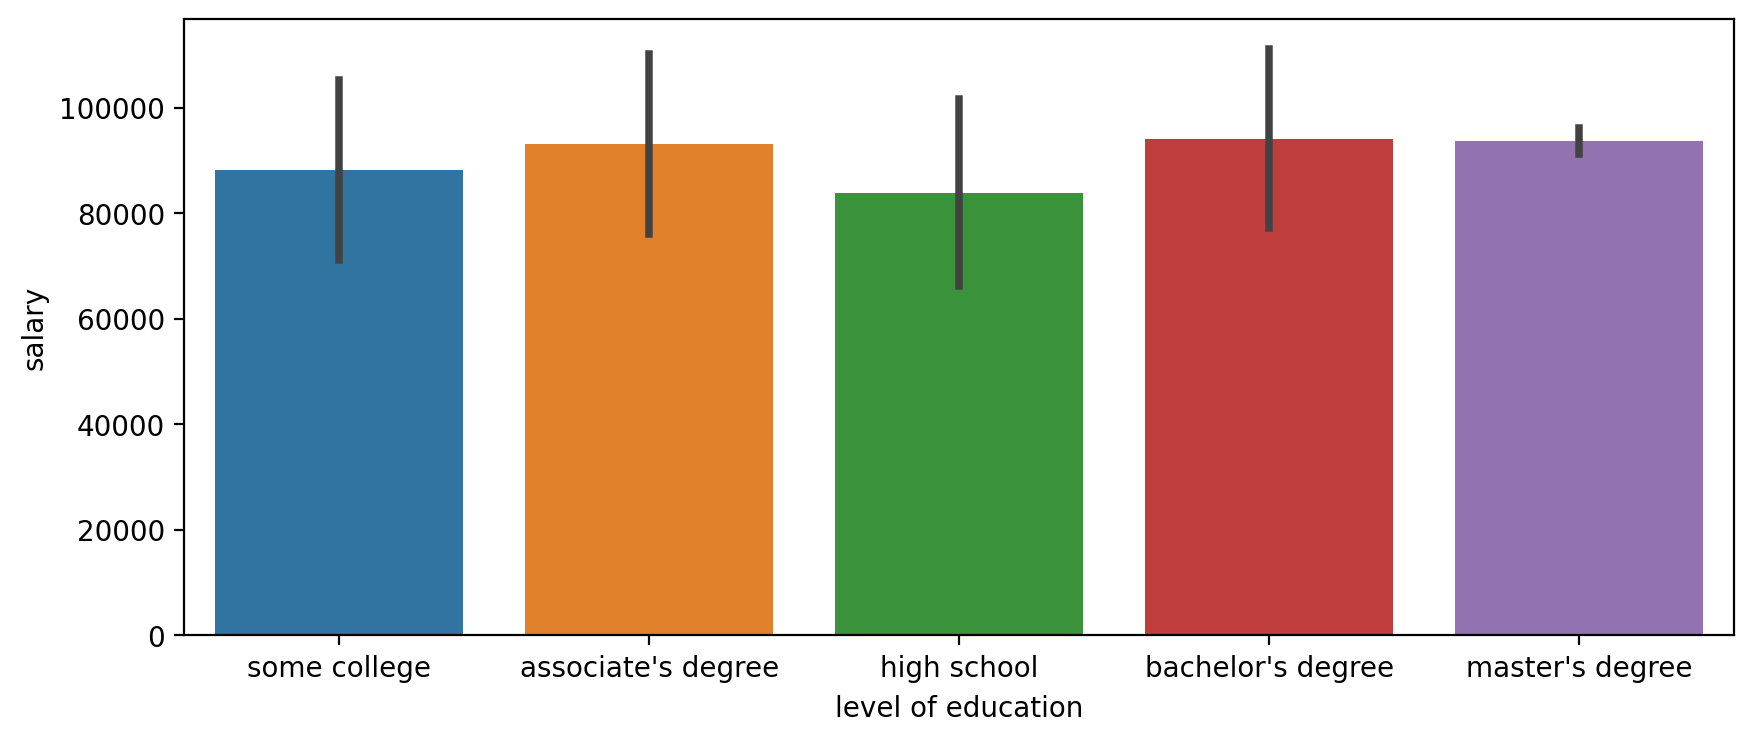

In [12]:
# instead of ci="sd", use errorbar="sd"
plt.figure(figsize=(10,4), dpi=200)
sns.barplot(data=df, x="level of education", y="salary", estimator=np.mean, errorbar="sd"); 

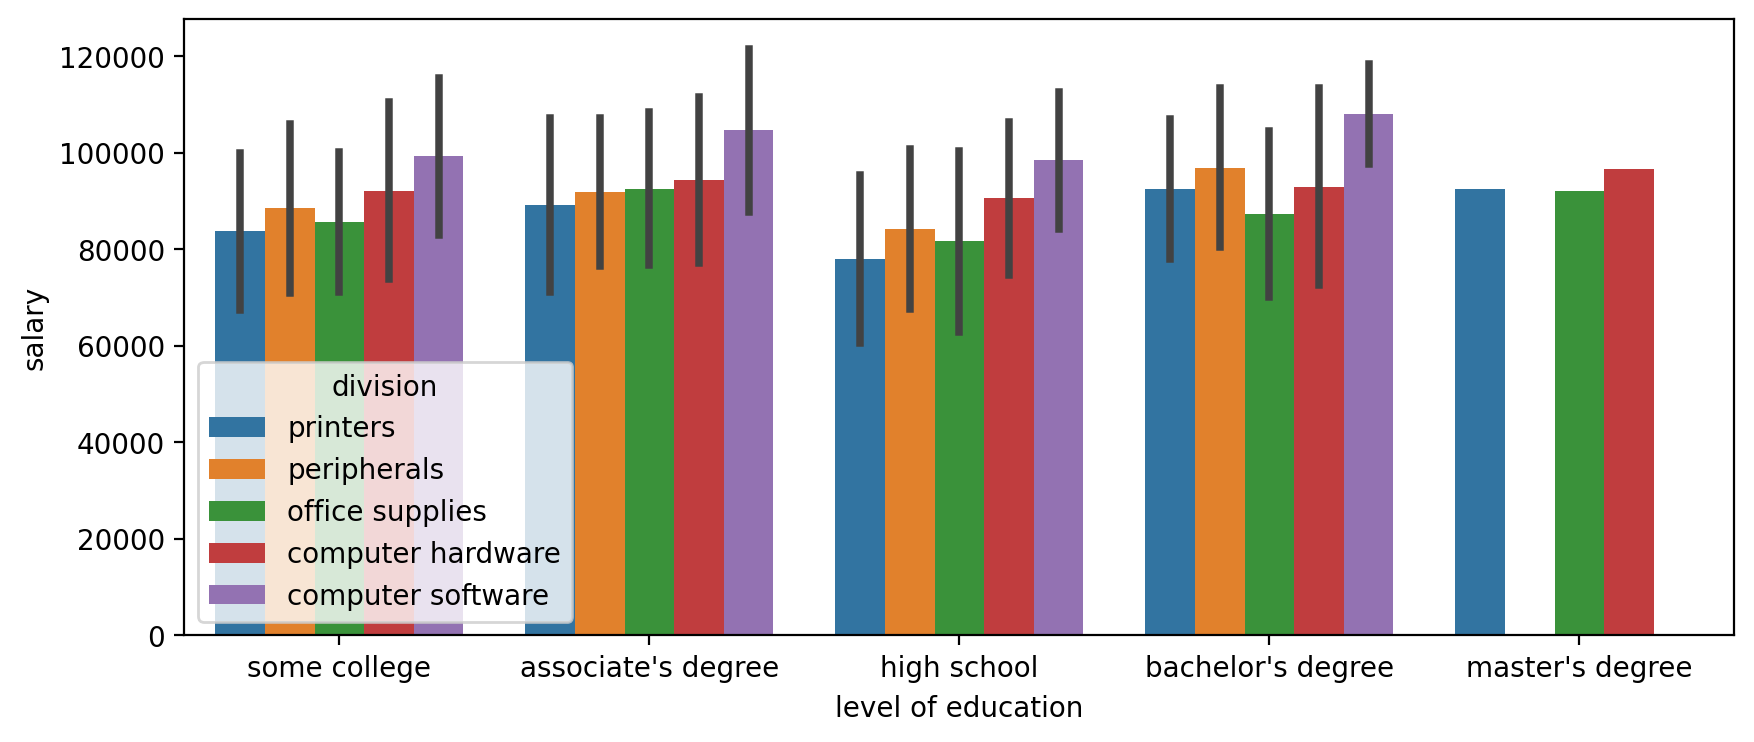

In [13]:
# use division as hue
plt.figure(figsize=(10,4), dpi=200)
sns.barplot(data=df, x="level of education", y="salary", hue="division", estimator=np.mean, errorbar="sd"); 

# Notice that since there are only 3 master's degree, there is no sd for these barplots

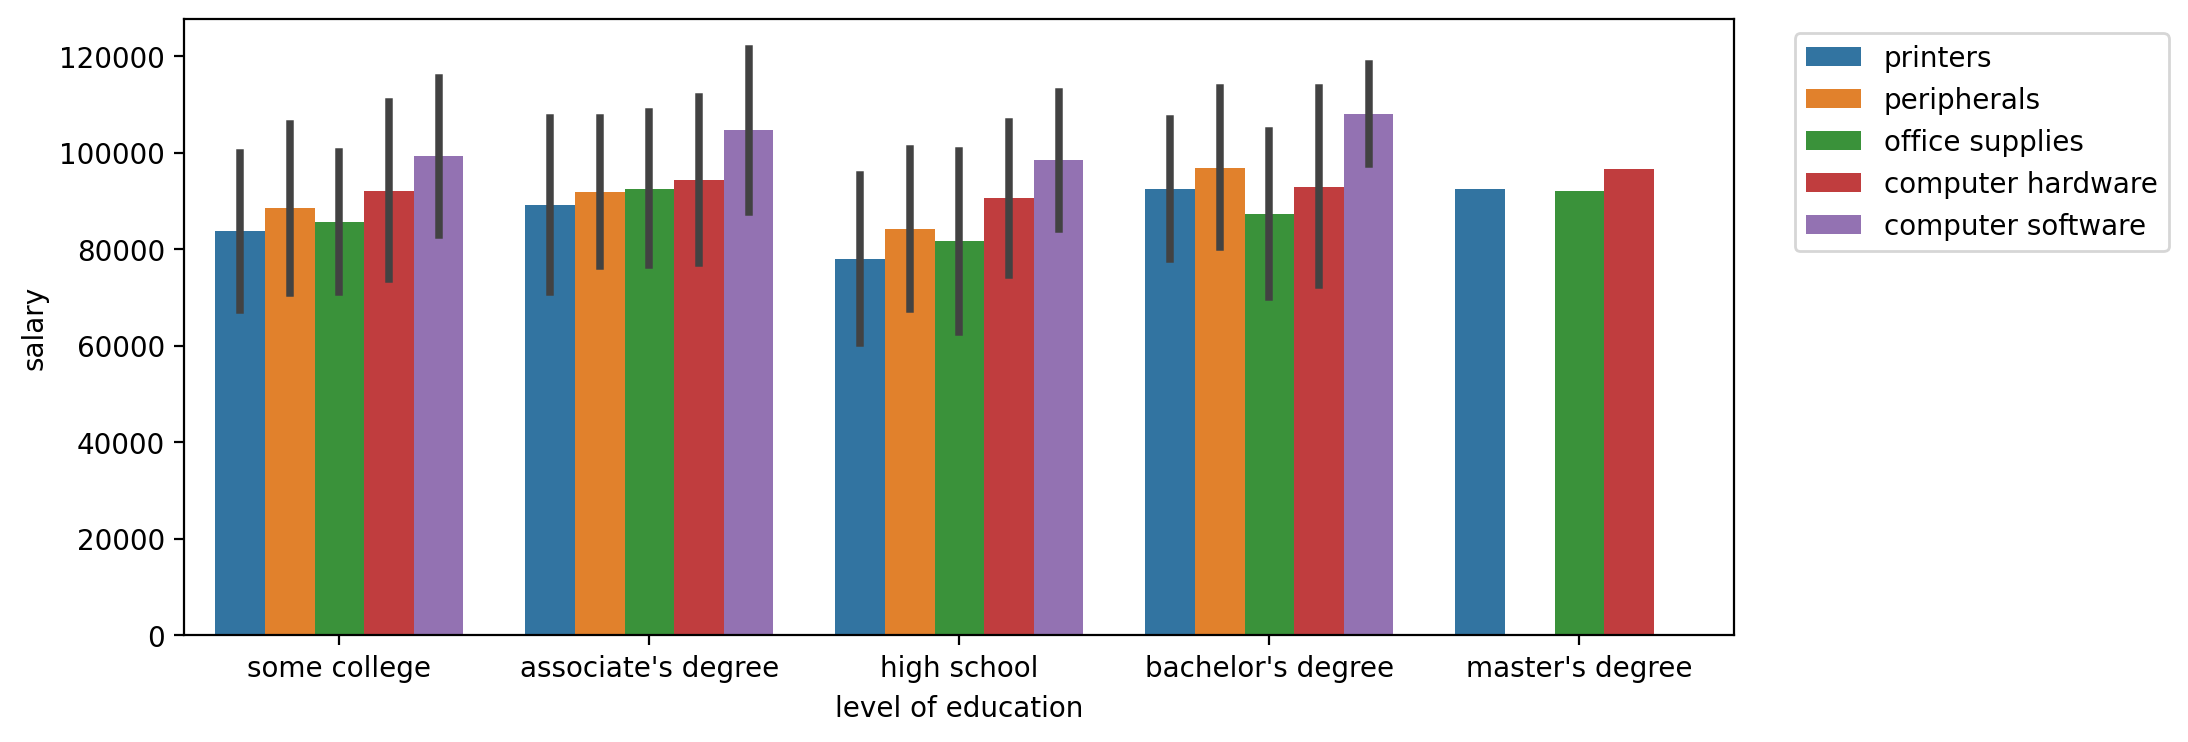

In [14]:
# let's put the legend aoutside the barplots
plt.figure(figsize=(10,4), dpi=200)
sns.barplot(data=df, x="level of education", y="salary", hue="division", estimator=np.mean, errorbar="sd") 

plt.legend(bbox_to_anchor=(1.03,1));

## 2. Categorical Plots: Distribution within Categories

* So far we've explored distribution plots for a single feature, but what if we want to compare distributions across categories? For example, instead of the distribution of everyone's salary, we can compare the distributions of salaries **per** level of education.
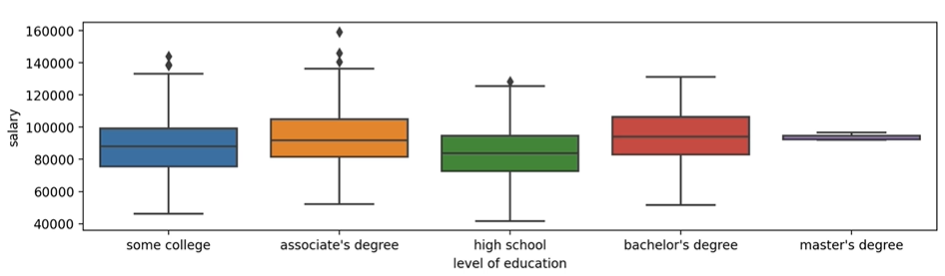

* Distribution within Categories: **Boxplot**, **Violinplot**, **Swarmplot**, **Boxenplot(Letter-Value-Plot)**

##### Import/read a new dataset

In [15]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 2.1. boxplot()
* Boxplot quicly gives statsitical distribution in a viual format.
* The Boxplot displays the distribution of a continuous variable. It does this through the use of quartiles.
* Quartiles separate out the data into 4 equal number of data points: 25% of data points are in bottom quartile. 50th percentile **(Q2) is the median** (The line inside the filled plot). The filled **area between Q1 and Q3 is called Interquartile Range (IQR)**. So, 50% of the data points is inside this box.

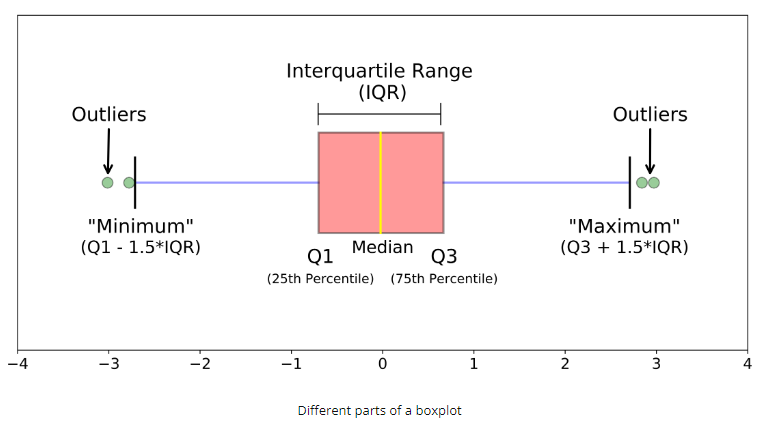

* The **whiskers** are defined by **1.5xIQR**.
* Outside of the whiskers are **outliers**.

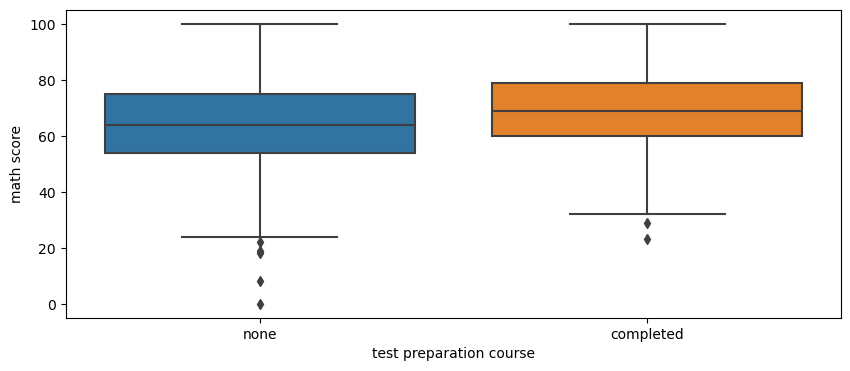

In [17]:
# the effect of the test preparation course on math score

plt.figure(figsize=(10,4), dpi=100)
sns.boxplot(data=df, y="math score", x="test preparation course");

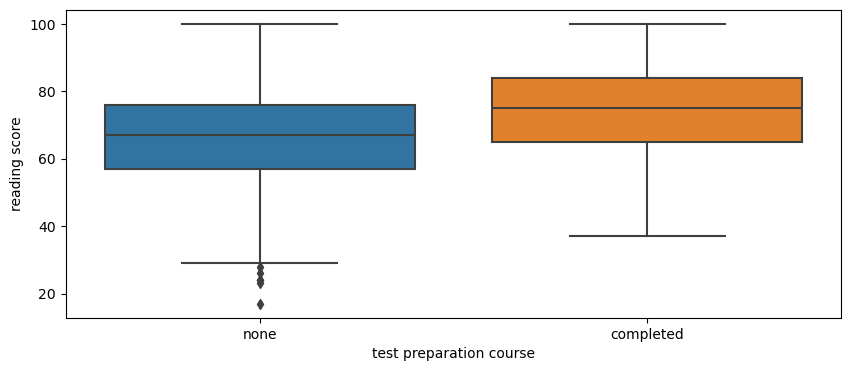

In [18]:
# the effect of the test preparation course on reading score

plt.figure(figsize=(10,4), dpi=100)
sns.boxplot(data=df, y="reading score", x="test preparation course") ;

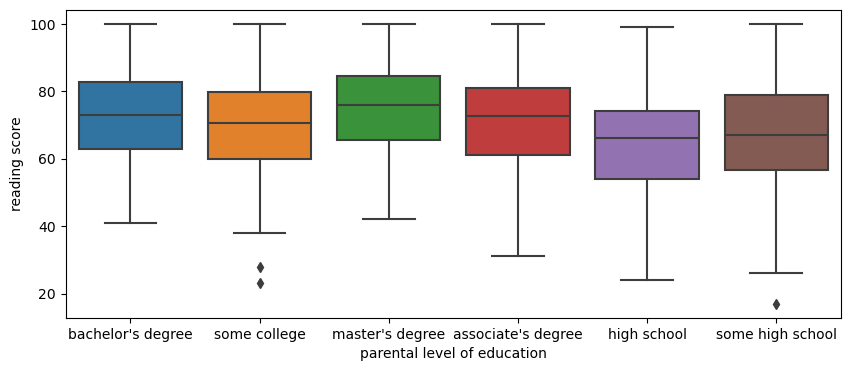

In [19]:
# how parental level of education affects the reading score

plt.figure(figsize=(10,4), dpi=100)
sns.boxplot(data=df, y="reading score", x="parental level of education");

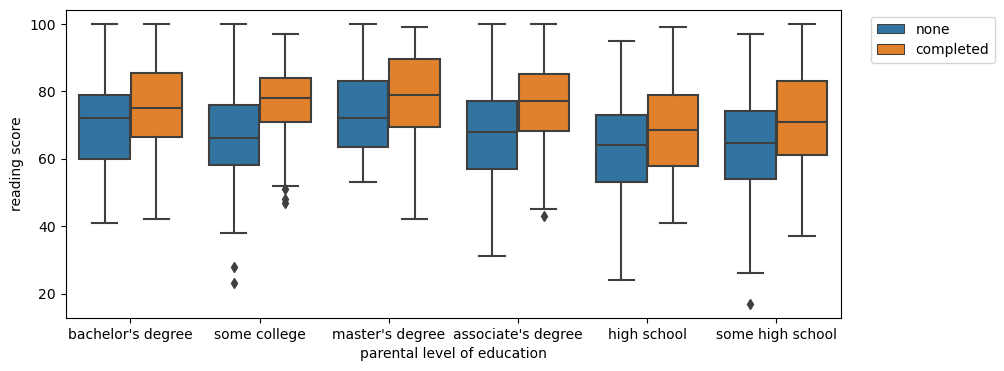

In [20]:
# Let's add "test preparation course" as hue

plt.figure(figsize=(10,4), dpi=100)
sns.boxplot(data=df, y="reading score", x="parental level of education", hue="test preparation course") 

# legend goes to outside of the canvas

plt.legend(bbox_to_anchor=(1.03,1));

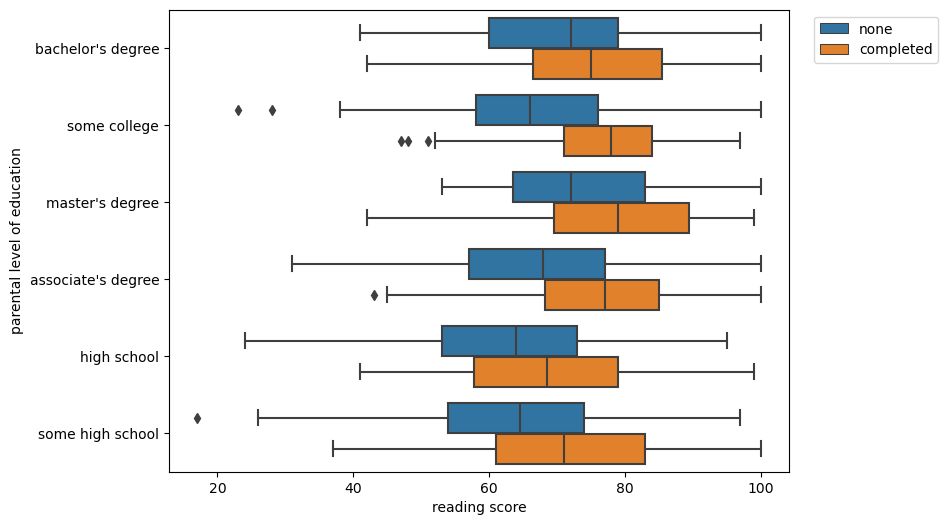

In [21]:
# Change the x and y axis

plt.figure(figsize=(8,6), dpi=100)
sns.boxplot(data=df, x="reading score", y="parental level of education", hue="test preparation course") 

# legend goes to outside of the canvas

plt.legend(bbox_to_anchor=(1.03,1));

#### Orientation (orient="")

<Axes: xlabel='math score', ylabel='parental level of education'>

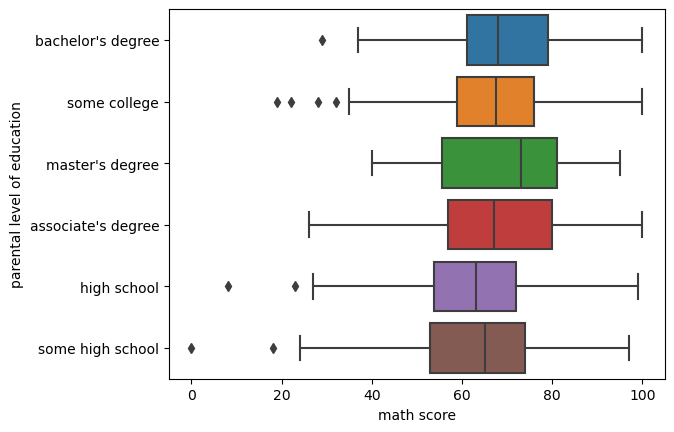

In [22]:
sns.boxplot(x='math score',y='parental level of education',data=df,orient='h')

#### Width

<Axes: xlabel='parental level of education', ylabel='math score'>

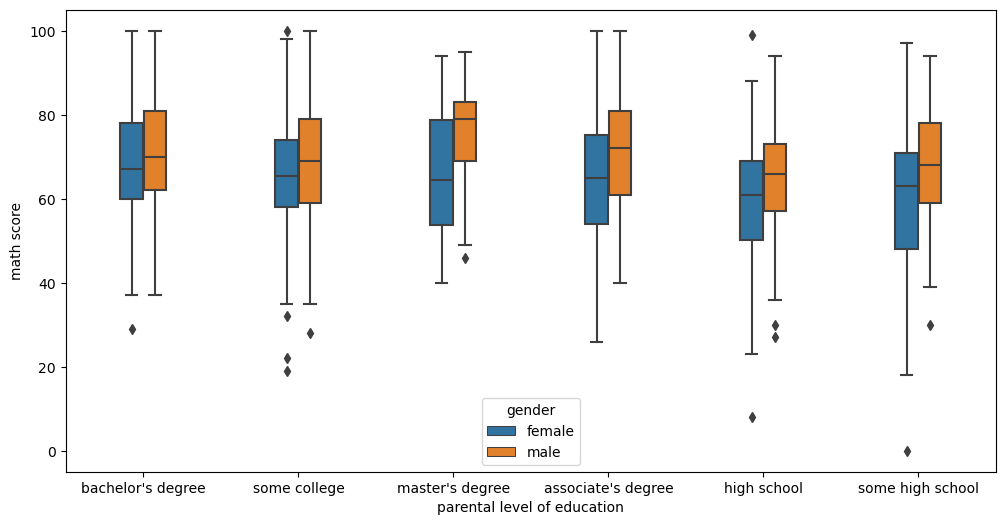

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(x='parental level of education',y='math score',data=df,hue='gender',width=0.3)

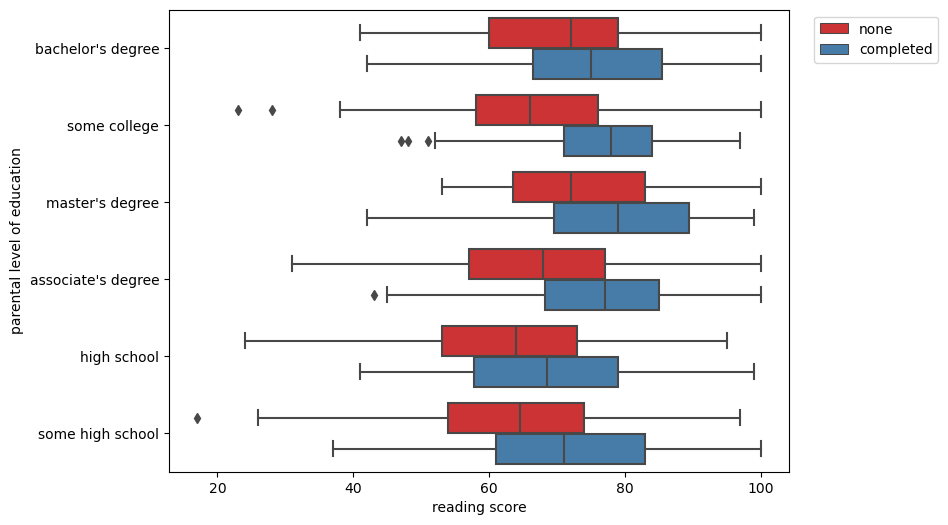

In [24]:
# Add palette

plt.figure(figsize=(8,6), dpi=100)
sns.boxplot(data=df, x="reading score", y="parental level of education", hue="test preparation course", palette="Set1") 

# legend goes to outside of the canvas

plt.legend(bbox_to_anchor=(1.03,1));

## 2.2. violinplot()
* The violin plot plays a similar role as the box plot.
* Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation (KDE) of the underlying distribution.
* We can imagine it as a mirrored KDE plot.
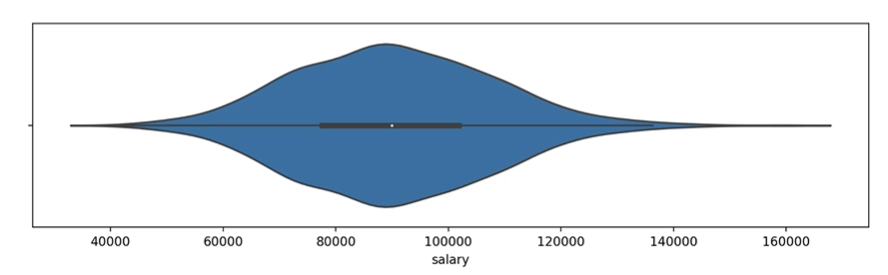

* White dot in the middle represents median.
* The black box inside is the IQR for the violin plot.

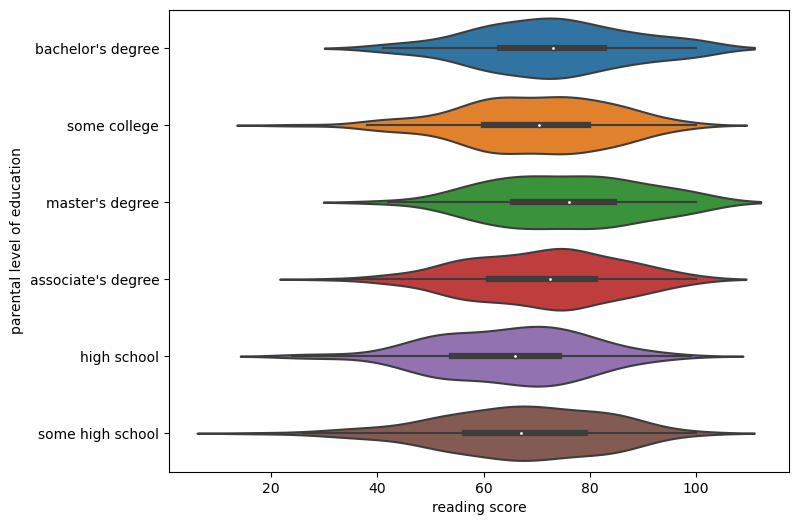

In [25]:
plt.figure(figsize=(8,6), dpi=100)
sns.violinplot(data=df, x="reading score", y="parental level of education");

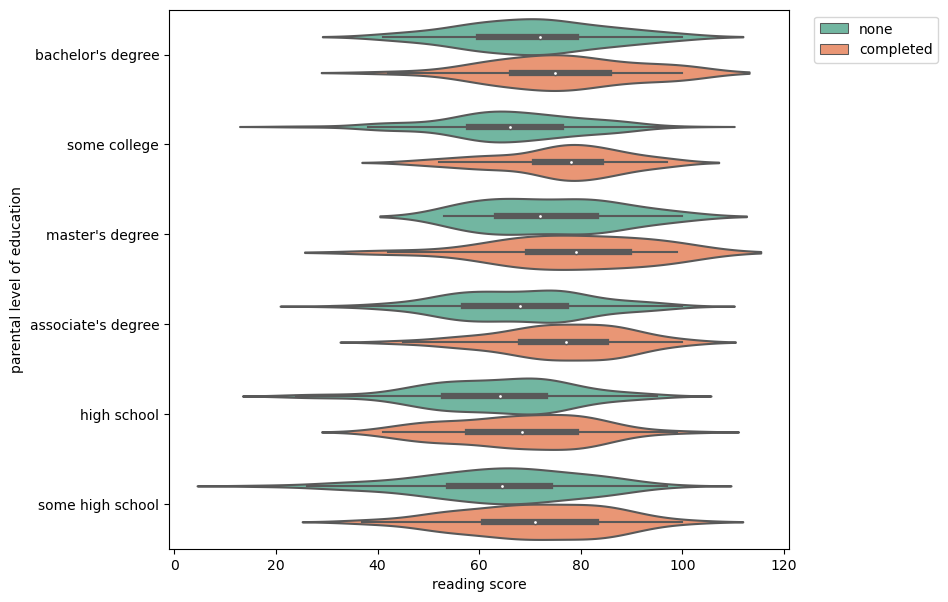

In [26]:
# We can also add hue to this violinplot

plt.figure(figsize=(8,7), dpi=100)
sns.violinplot(data=df, x="reading score", y="parental level of education", hue="test preparation course", palette="Set2") 

# legend goes to outside of the canvas

plt.legend(bbox_to_anchor=(1.03,1));

#### split=True
USe split to see the categories in one violin plot. This can make it easier to directly compare the distributions.

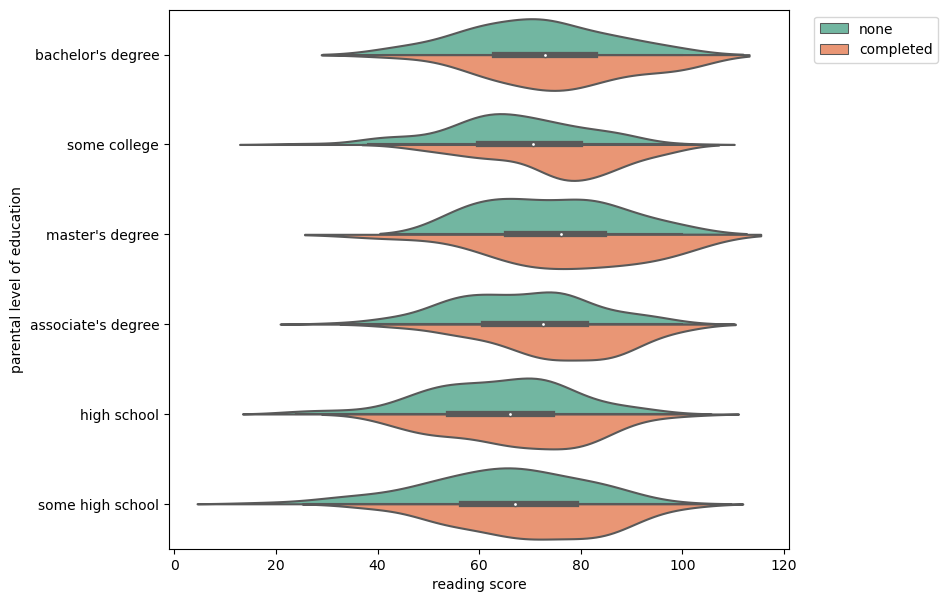

In [27]:
plt.figure(figsize=(8,7), dpi=100)
sns.violinplot(data=df, x="reading score", y="parental level of education", hue="test preparation course", palette="Set2", split=True) 

plt.legend(bbox_to_anchor=(1.03,1));

#### inner=None
To remove white point(median) in the middle of violin plot

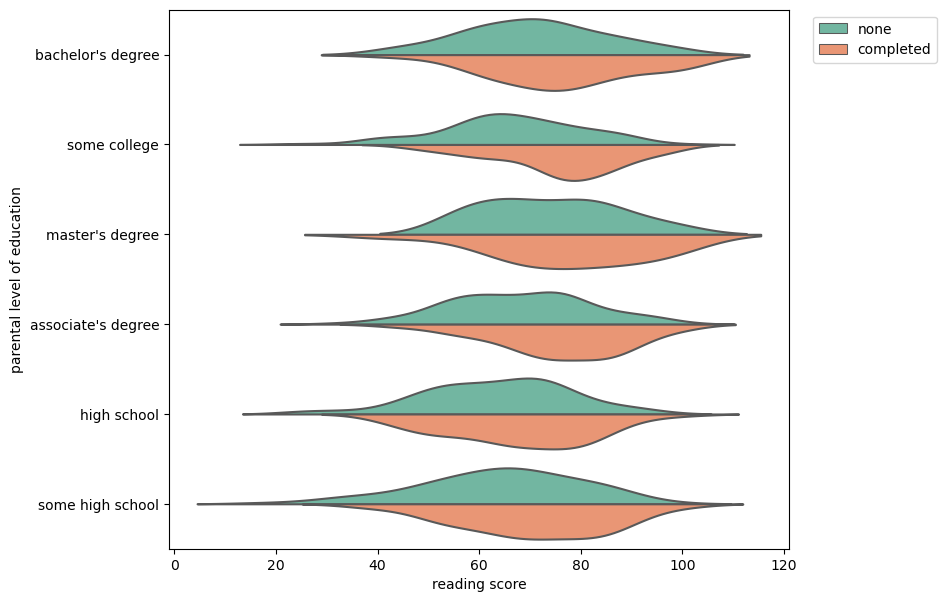

In [28]:
plt.figure(figsize=(8,7), dpi=100)
sns.violinplot(data=df, x="reading score", y="parental level of education", 
               hue="test preparation course", palette="Set2", split=True, inner=None) 

plt.legend(bbox_to_anchor=(1.25,1));

#### inner="quartile"

To show the quartiles

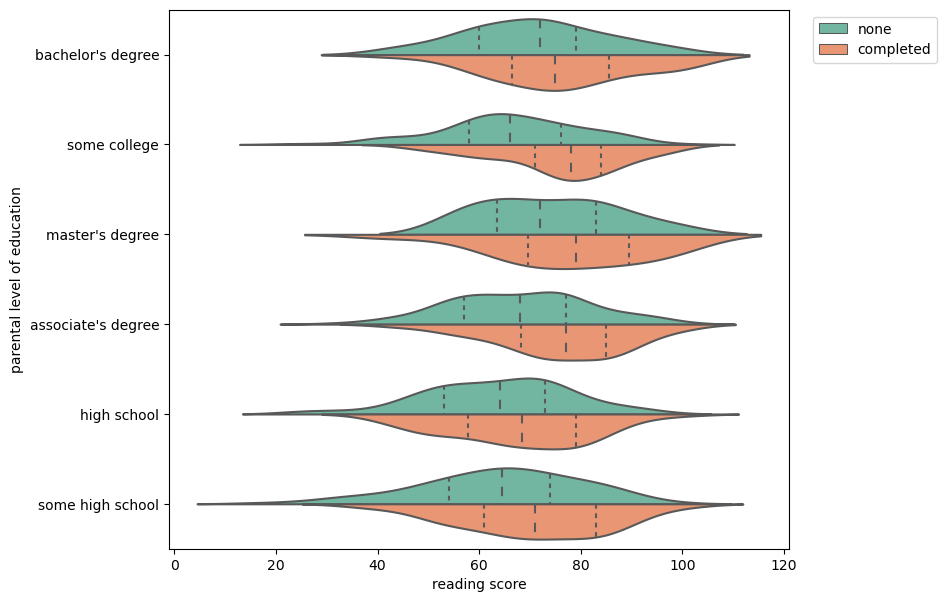

In [29]:
plt.figure(figsize=(8,7), dpi=100)
sns.violinplot(data=df, x="reading score", y="parental level of education", 
               hue="test preparation course", palette="Set2", split=True, inner="quartile") 

plt.legend(bbox_to_anchor=(1.25,1));

#### inner="stick"
To show every instance

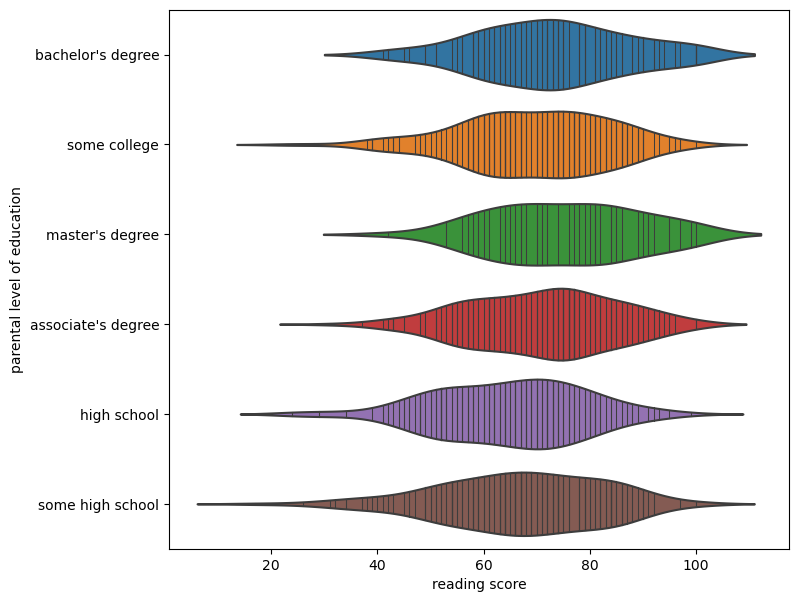

In [30]:
plt.figure(figsize=(8,7), dpi=100)
sns.violinplot(data=df, x="reading score", y="parental level of education", inner="stick");

#### inner="box"

<Axes: xlabel='parental level of education', ylabel='math score'>

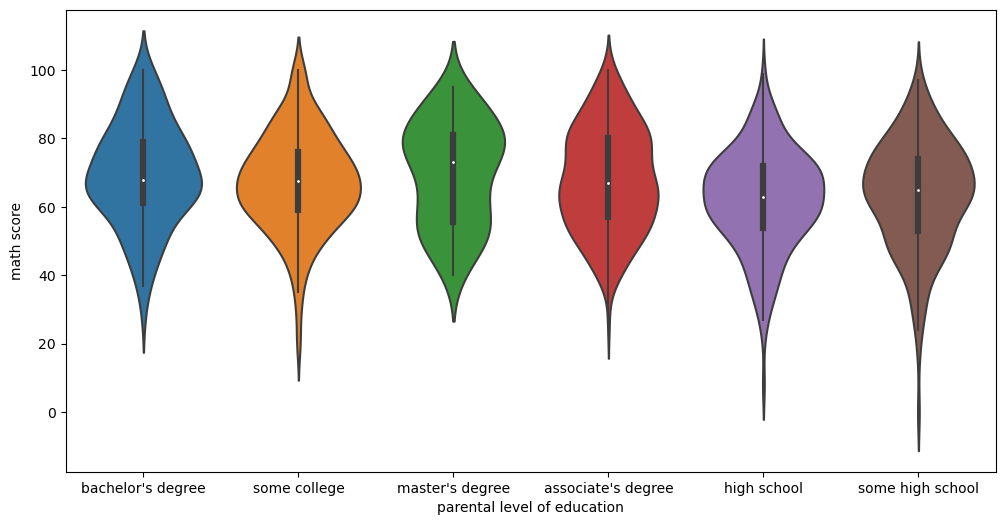

In [31]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',data=df,inner='box')

#### orientation
Simply switch the continuous variable to y and the categorical to x

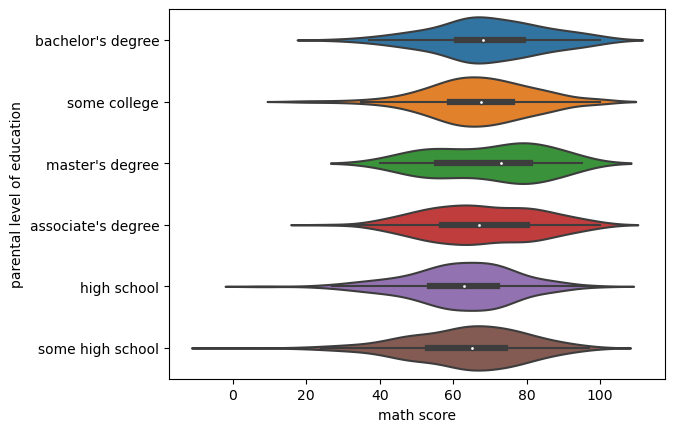

In [32]:
sns.violinplot(x='math score',y='parental level of education',data=df);

#### bandwidth (bw)
To see the noise better as in kde plot

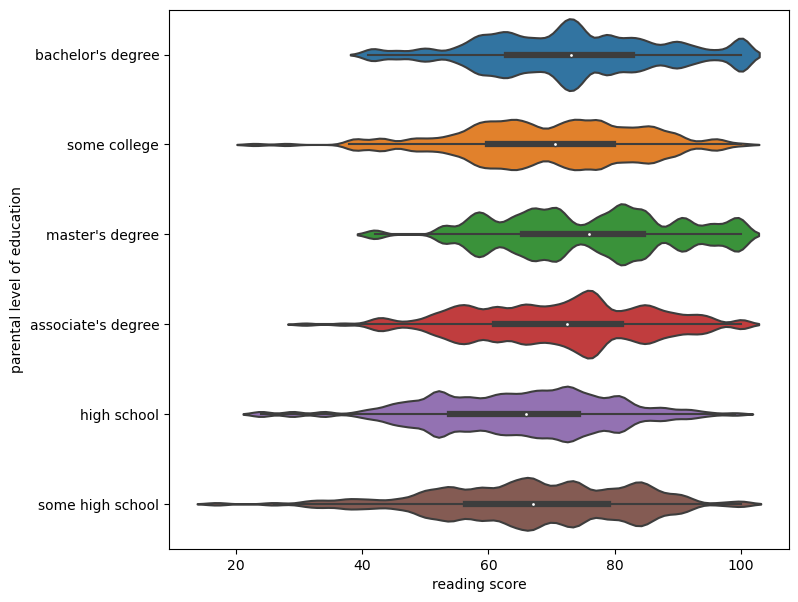

In [33]:
plt.figure(figsize=(8,7), dpi=100)
sns.violinplot(data=df, x="reading score", y="parental level of education", bw=0.1);   # for small bw

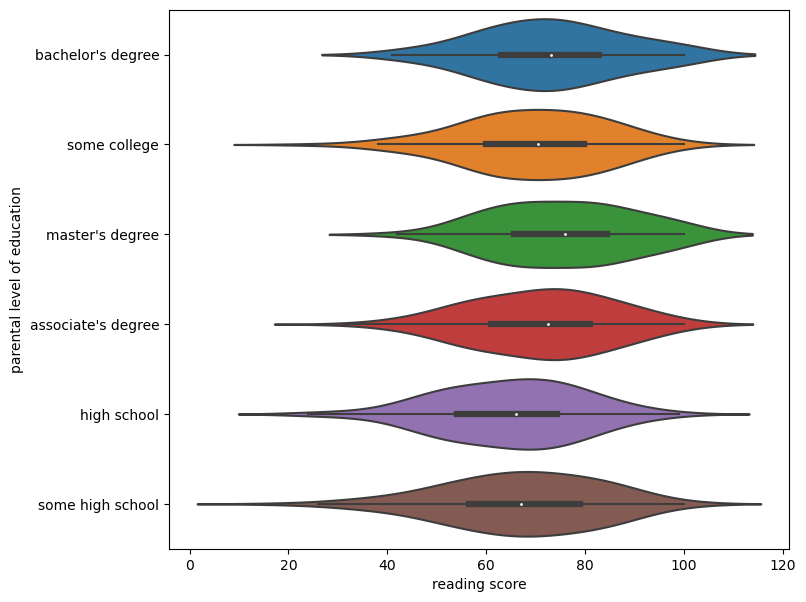

In [34]:
# for bigger number of bw variation is not much visible
plt.figure(figsize=(8,7), dpi=100)
sns.violinplot(data=df, x="reading score", y="parental level of education", bw=0.5);   

## 2.3. swarmplot()
* The swarmplot is very simple and simply shows all the data points in the distribution.
* For very large data sets, it won't show all the points, but will display the general distribution of them.
* Although it resembles violinplot, swarmplot does not show a mirrored immage.

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


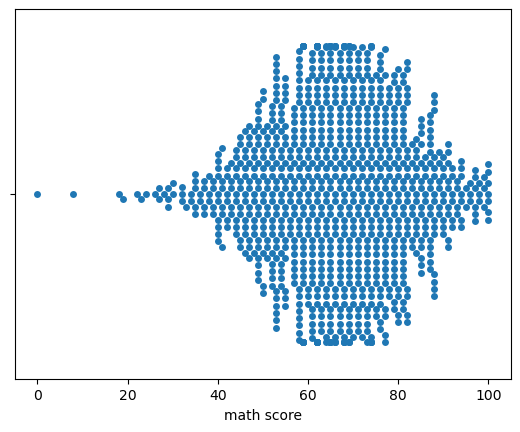

In [35]:
sns.swarmplot(data=df, x="math score");

#### size

As seen above warning ( 7.3% of the points cannot be placed), we need to adjust the size to display it better.

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


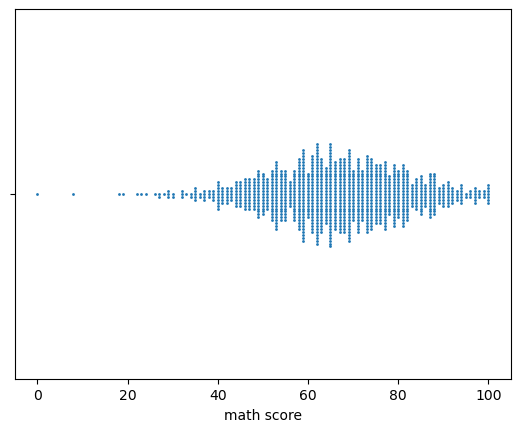

In [36]:
sns.swarmplot(data=df, x="math score", size=2);

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


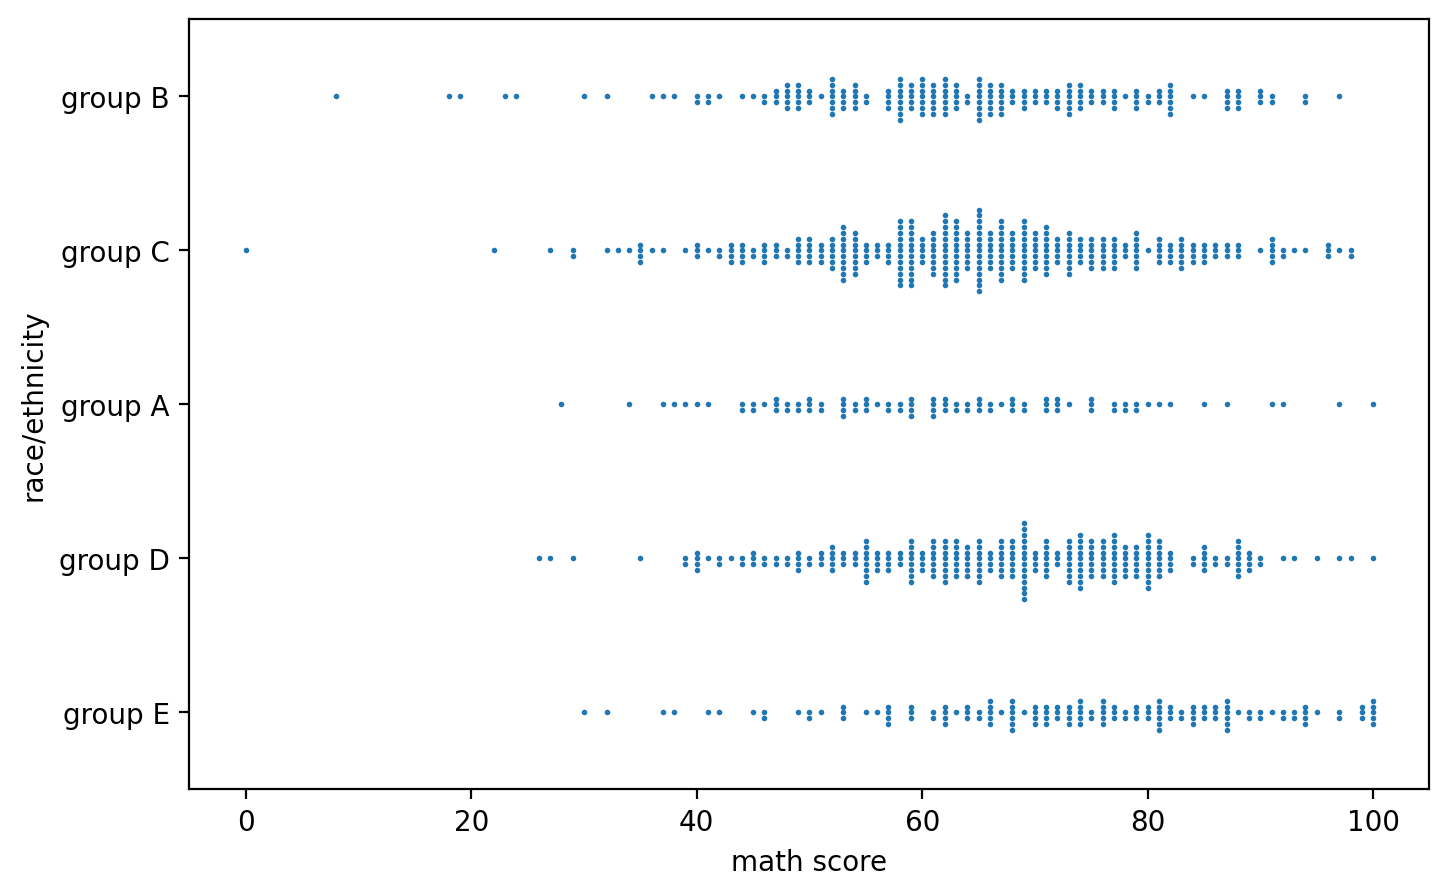

In [37]:
plt.figure(figsize=(8,5), dpi=200)
sns.swarmplot(data=df, x="math score", y="race/ethnicity", size=2);

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


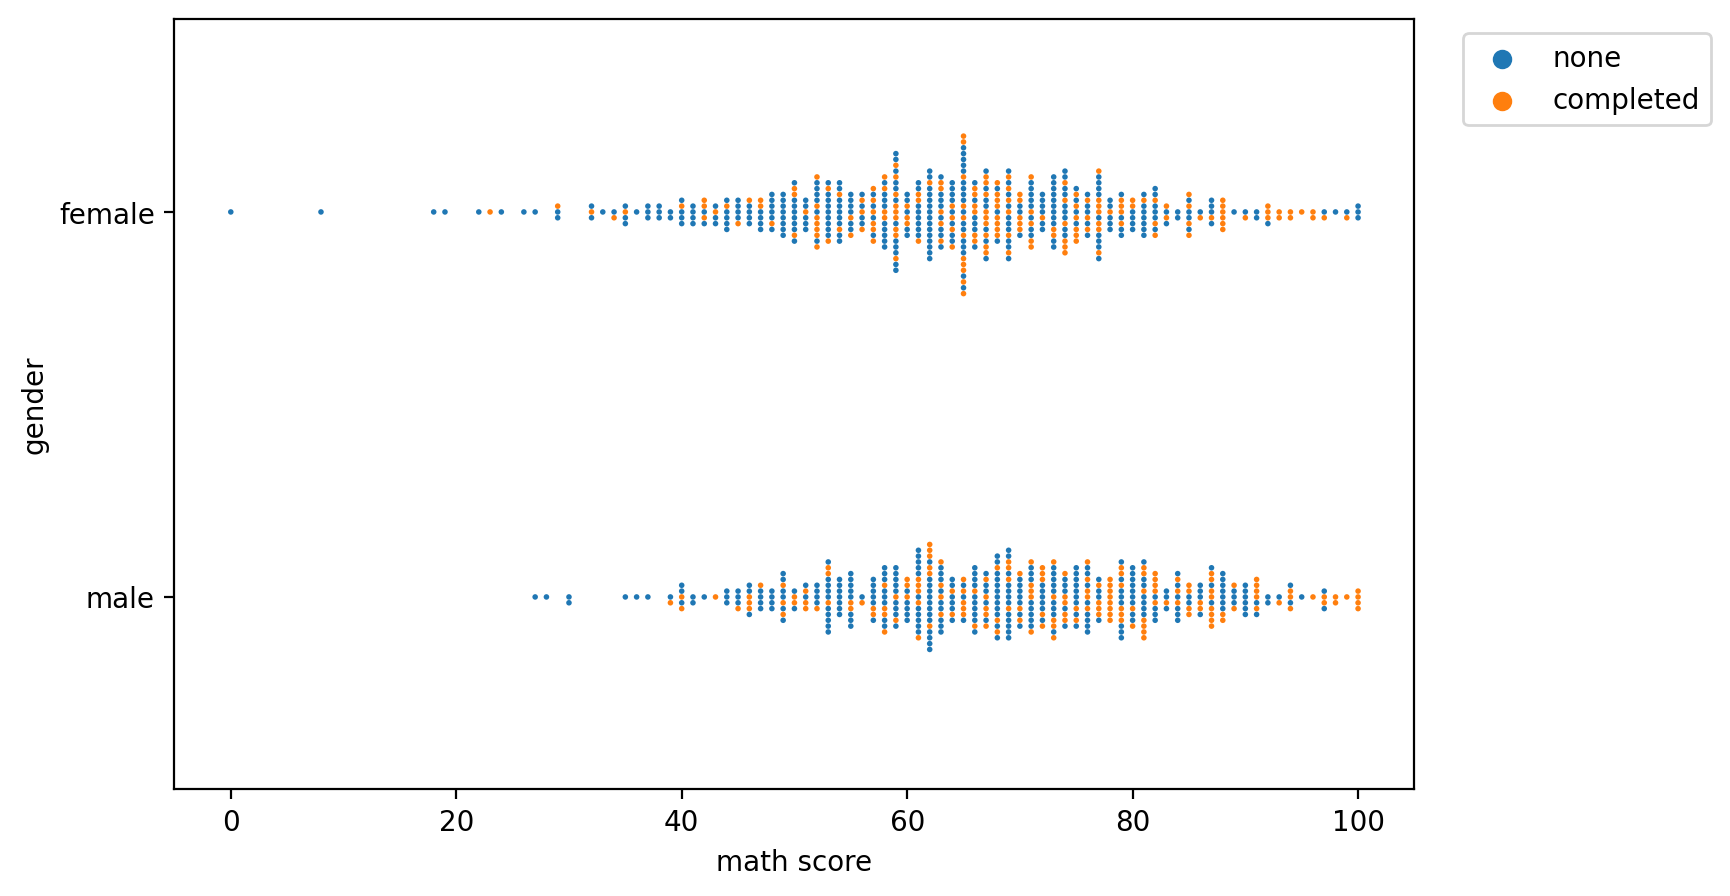

In [38]:
# Let's add hue as another dimension

plt.figure(figsize=(8,5), dpi=200)
sns.swarmplot(data=df, x="math score", y="gender", hue="test preparation course", size=2)

# legend goes to the outside of the canvas
plt.legend(bbox_to_anchor=(1.25,1));

#### dodge=True

To split up the categories

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


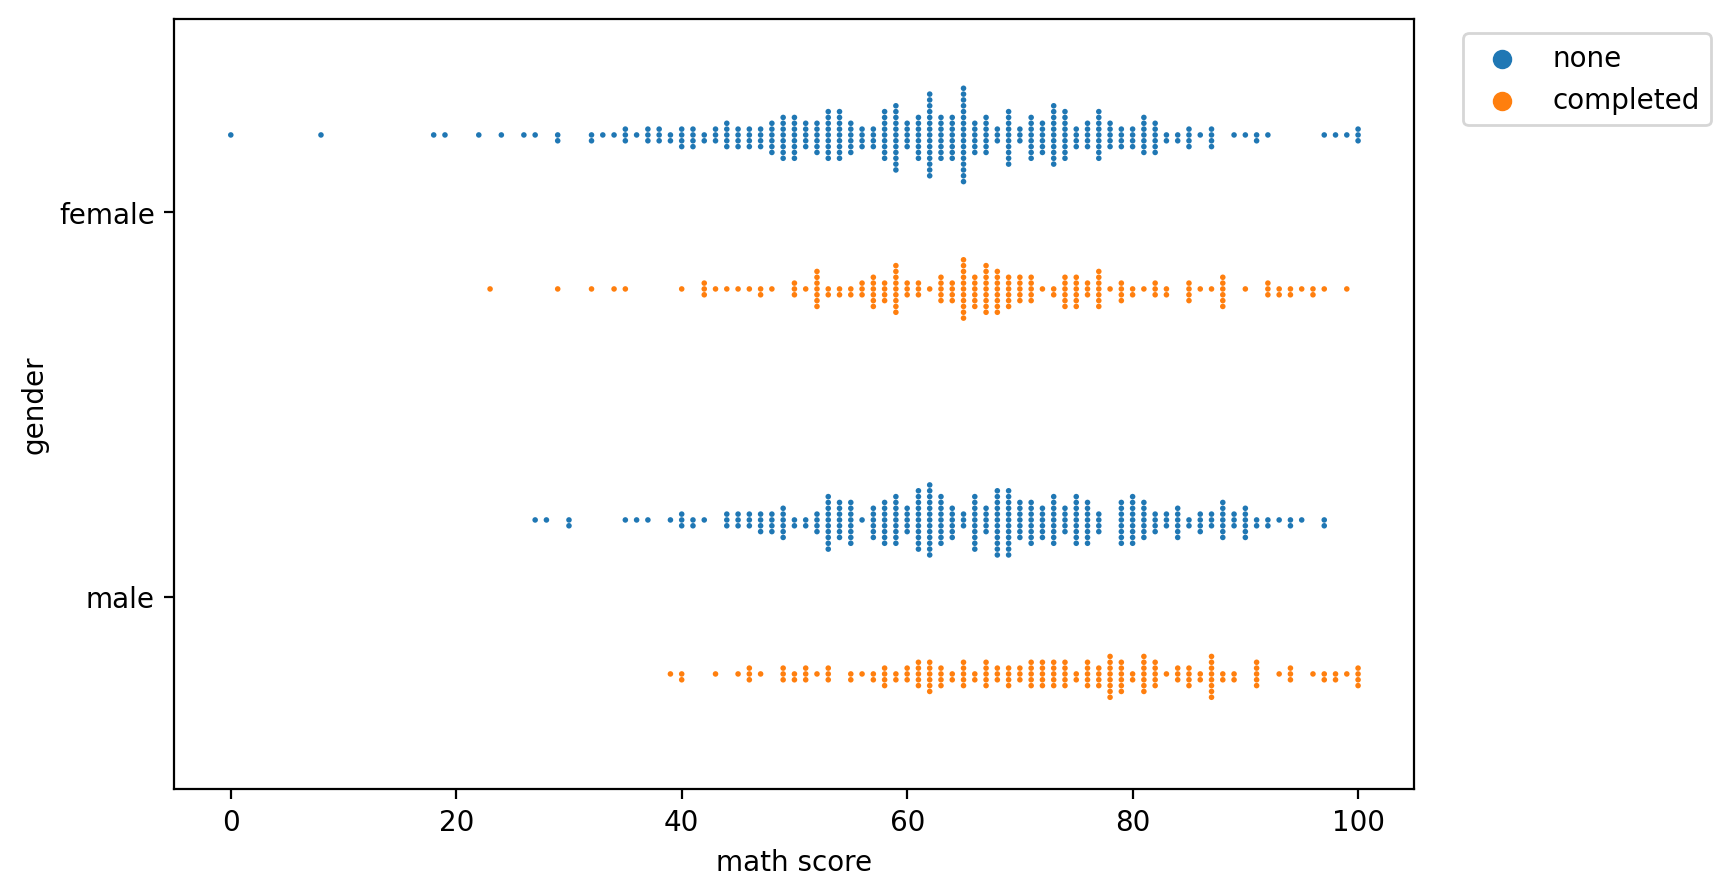

In [39]:

plt.figure(figsize=(8,5), dpi=200)
sns.swarmplot(data=df, x="math score", y="gender", hue="test preparation course", size=2, dodge=True)

# legend goes to the outside of the canvas
plt.legend(bbox_to_anchor=(1.25,1));

## 2.4. boxenplot() 
* The boxenplot(Letter-value plot) is a relatively new plot developed in 2011.
* It is knownn as a “letter value” plot because it shows a large number of quantiles that are defined as “letter values”.
* It is mainly designed as an expansion upon the normal box plot.
* By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails.
* It is currently not very common. Use this plot type if your audience is familiar with it.
* Boxenplot showing letter-value quantiles (not quartiles) to display against a standard boxplot:
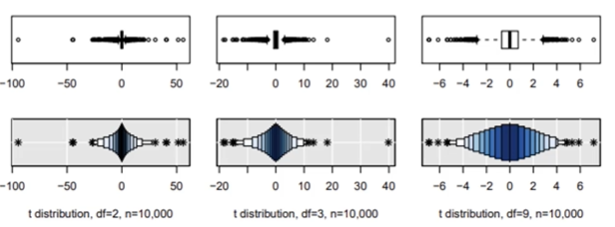

Official Paper on this plot: https://vita.had.co.nz/papers/letter-value-plot.html

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


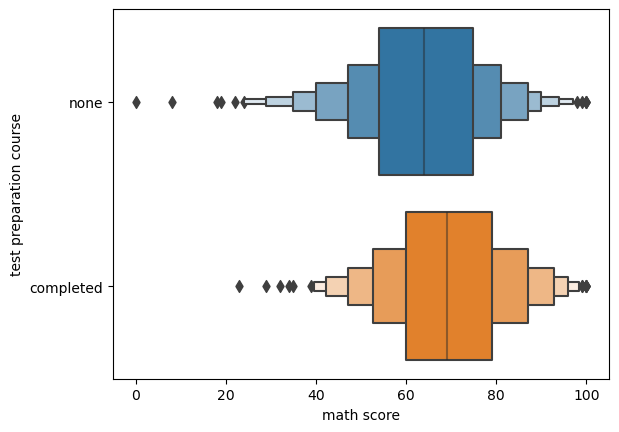

In [40]:
sns.boxenplot(data=df, x="math score", y="test preparation course");

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

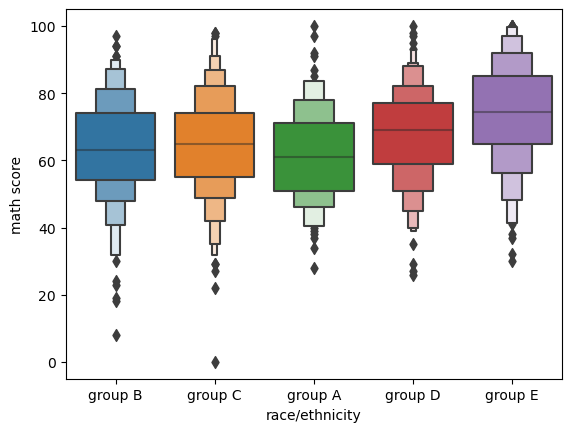

In [41]:
sns.boxenplot(x='race/ethnicity',y='math score',data=df);

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

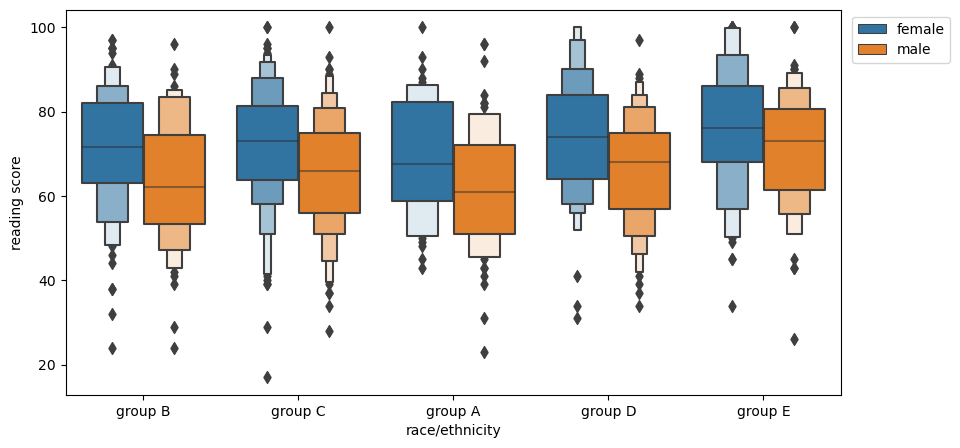

In [42]:
# We can add hue
plt.figure(figsize=(10,5))
sns.boxenplot(data=df, x="race/ethnicity", y="reading score", hue="gender")

# legend goes to outside the canvas
plt.legend(bbox_to_anchor=(1.15, 1));

#### box plot vs boxen plot

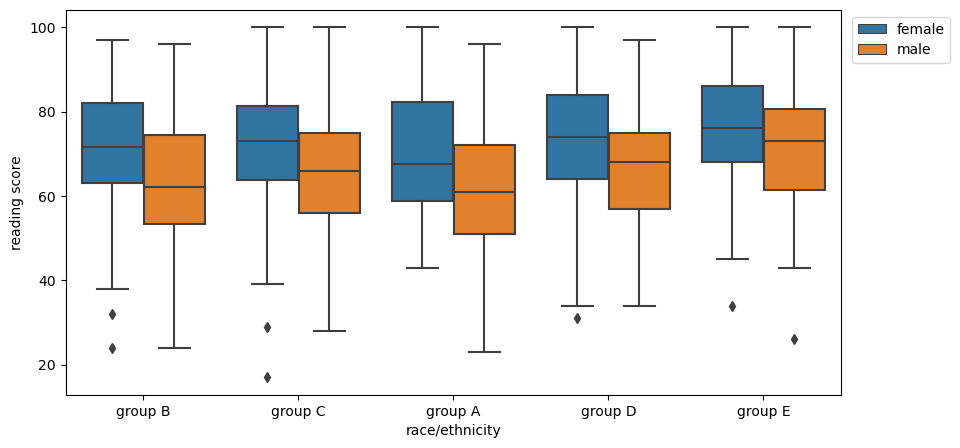

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="race/ethnicity", y="reading score", hue="gender")

# legend goes to outside the canvas
plt.legend(bbox_to_anchor=(1.15, 1));